In [19]:
#Install cowplot to use plot_grid function for better readability (optional) 
install.packages('cowplot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [20]:
library(tidyverse)
library(tidymodels)
library(cowplot)

First, we read the data into Jupyter and clean it so that....

In [21]:
#Read the data from the webpage into Jupyter
heart_disease <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
#Add column names based on the information given by the dataset webpage (to improve readability)
colnames(heart_disease) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "ST_level", "slope", "number_of_major_vessels", "thal", "diagnosis_of_heart_disease")
#Select chosen predictor and class variables 
heart_data <- heart_disease |> mutate(diagnosis = as_factor(diagnosis_of_heart_disease)) |> select(age, resting_blood_pressure, chol, ST_level, diagnosis)
#Check to see if there are any NA values
which(is.na(heart_data))
    #There aren't any NA values (the function returned no positions with missing values)

head(heart_data, n =8)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


integer(0)

age,resting_blood_pressure,chol,ST_level,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,2.3,0
67,160,286,1.5,2
67,120,229,2.6,1
37,130,250,3.5,0
41,130,204,1.4,0
56,120,236,0.8,0
62,140,268,3.6,3
57,120,354,0.6,0


In [22]:
#In the class variable, diagnosis, values 1-4 indicate presence of heart disease (to varying amounts of severity); we can assign all these values as "1" to indicate that there is a heart disease
heart_data["diagnosis"][heart_data["diagnosis"] == "2"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "3"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "4"] <- "1"

In [23]:
#Split data into training and testing data; 75:25 split was chosen arbitrarily
heart_split <- initial_split(heart_data, prop = 0.75, strata = diagnosis)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)


##Summarize Data

In [24]:
#Find the number of observations for each class (heart disease = 1 or no heart disease = 0) as well as the mean of each predictor
heart_summary <- heart_train |> group_by(diagnosis) |> summarize(number_of_observations = n(), mean_bp = mean(resting_blood_pressure), mean_chol = mean(chol), mean_st = mean(ST_level))


(INTERPRET TABLE)

In [25]:
heart_summary

diagnosis,number_of_observations,mean_bp,mean_chol,mean_st
<fct>,<int>,<dbl>,<dbl>,<dbl>
0,123,130.3902,241.3821,0.6186992
1,104,136.1250,254.1538,1.5865385


In [26]:
Now we can graph to show the distribution of our predictors (show that it is possible to classify using them)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Now we
        ^


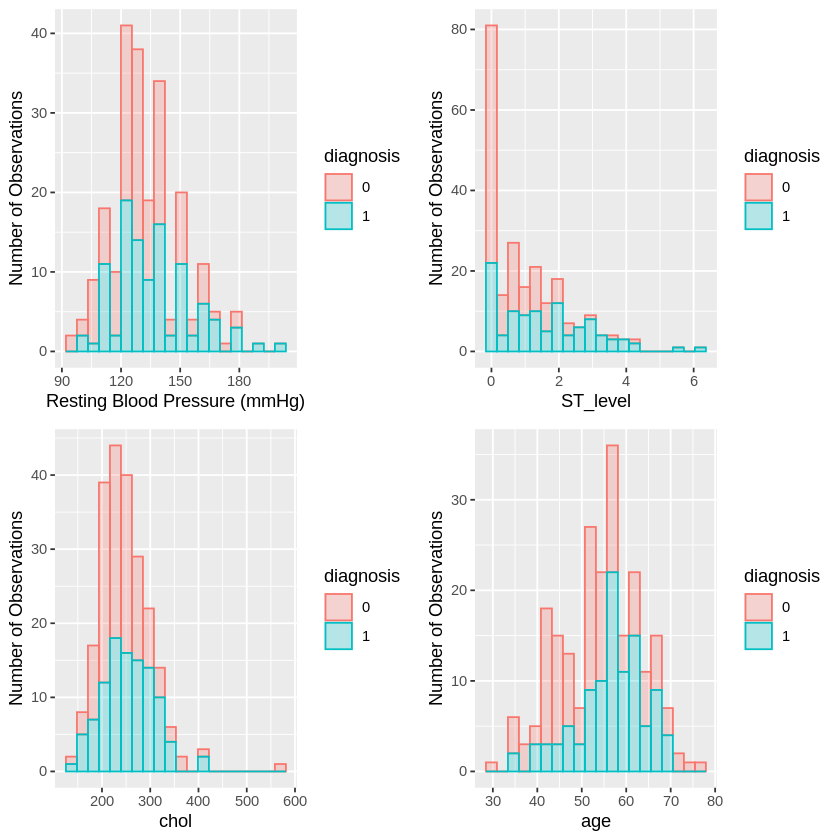

In [29]:
#Plot the distributions of each predictor (each histogram only considers one factor and the results may be influenced by other factors)
bp_distribution <- ggplot(heart_train, aes(x = resting_blood_pressure, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20,alpha = 0.25) + labs(x = "Resting Blood Pressure (mmHg)", y = "Number of Observations")
                     
chol_distribution <- ggplot(heart_train, aes(x = chol, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20, alpha = 0.25) + labs("Serum Cholestoral (mg/dl)", y = "Number of Observations")

age_distribution <- ggplot(heart_train, aes(x = age, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20,alpha = 0.25) + labs("Age", y = "Number of Observations")

st_distribution <- ggplot(heart_train, aes(x = ST_level, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20, alpha = 0.25) + labs("ST Level", y = "Number of Observations")

plot_grid(bp_distribution, st_distribution, chol_distribution, age_distribution)

(FROM THESE GRAPHS WE CAN CONCLUDE...)